<a href="https://colab.research.google.com/github/FariqJavier/Time-Series-Forecasting-Model/blob/main/Time_Series_Pre_Trained_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d bukolafatunde/personal-finance

Dataset URL: https://www.kaggle.com/datasets/bukolafatunde/personal-finance
License(s): unknown
  0% 0.00/7.17k [00:00<?, ?B/s]
100% 7.17k/7.17k [00:00<00:00, 9.48MB/s]


In [5]:
import zipfile

with zipfile.ZipFile('/content/personal-finance.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [6]:
import pandas as pd

In [416]:
expenses_df = pd.read_csv('../content/personal_transactions.csv')
expenses_df.head()

,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card


In [417]:
# Remove old rows
expenses_df = expenses_df[expenses_df.Amount.notna()].reset_index(drop=True)
# Remove not usefull columns
expenses_df = expenses_df.drop(['Description', 'Category', 'Account Name'], axis=1)

expenses_df.head()

,Date,Amount,Transaction Type
0,01/01/2018,11.11,debit
1,01/02/2018,1247.44,debit
2,01/02/2018,24.22,debit
3,01/03/2018,2298.09,credit
4,01/04/2018,11.76,debit


In [418]:
from datetime import datetime, date

expenses_df['Date'] = pd.to_datetime(expenses_df['Date'], format = '%m/%d/%Y')
expenses_df.head().style.set_properties(subset=['Date'], **{'background-color': 'dodgerblue'})

,Date,Amount,Transaction Type
0,2018-01-01 00:00:00,11.110000,debit
1,2018-01-02 00:00:00,1247.440000,debit
2,2018-01-02 00:00:00,24.220000,debit
3,2018-01-03 00:00:00,2298.090000,credit
4,2018-01-04 00:00:00,11.760000,debit


In [419]:
import matplotlib.pyplot as plt

In [420]:
import seaborn as sns

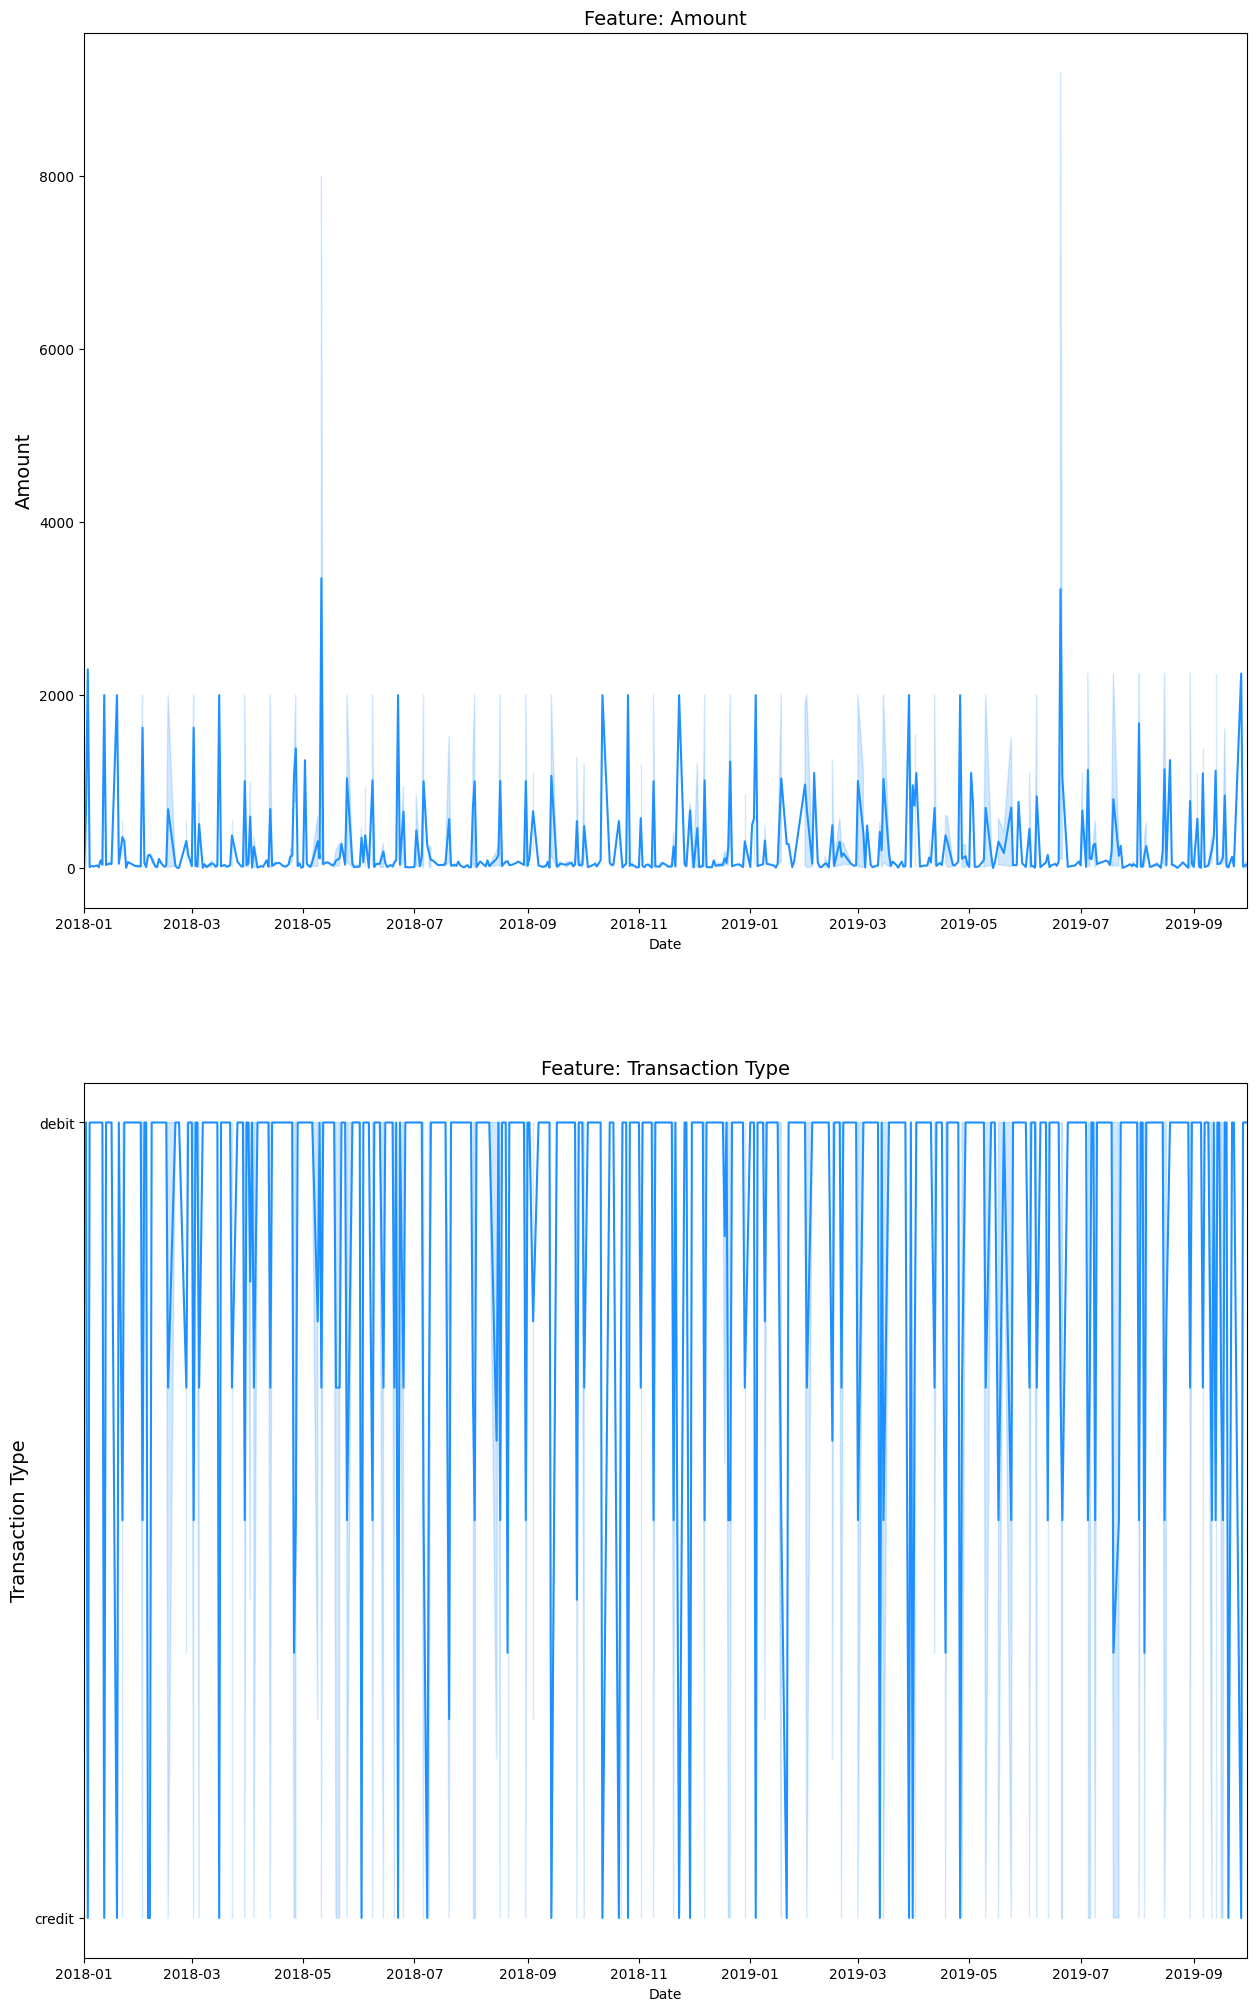

In [421]:
# To compelte the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 25))

for i, column in enumerate(expenses_df.drop('Date', axis=1).columns):
    sns.lineplot(x=expenses_df['Date'], y=expenses_df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)

    ax[i].set_xlim([date(2018, 1, 1), date(2019, 9, 30)])

In [422]:
# Group by Date and sum the Amount
daily_expenses_df = expenses_df.groupby('Date')['Amount'].sum().reset_index()

# Filter only debit transactions
debit_expenses_df = expenses_df[expenses_df['Transaction Type'] == 'debit']
# Remove not usefull columns
debit_expenses_df = debit_expenses_df.drop(['Transaction Type'], axis=1)

# Filter only credit transactions
credit_expenses_df = expenses_df[expenses_df['Transaction Type'] == 'credit']
# Remove not usefull columns
credit_expenses_df = credit_expenses_df.drop(['Transaction Type'], axis=1)

In [423]:
daily_expenses_df.head()

,Date,Amount
0,2018-01-01,11.11
1,2018-01-02,1271.66
2,2018-01-03,2298.09
3,2018-01-04,11.76
4,2018-01-05,25.85


In [424]:
debit_expenses_df.head()

,Date,Amount
0,2018-01-01,11.11
1,2018-01-02,1247.44
2,2018-01-02,24.22
4,2018-01-04,11.76
5,2018-01-05,25.85


In [425]:
credit_expenses_df.head()

,Date,Amount
3,2018-01-03,2298.09
13,2018-01-12,2000.00
20,2018-01-19,2000.00
22,2018-01-22,554.99
23,2018-01-22,309.81


In [426]:
# Set the Date column as the index
daily_expenses_df.set_index('Date', inplace=True)

# Create a full date range
full_date_range = pd.date_range(start=daily_expenses_df.index.min(), end=daily_expenses_df.index.max(), freq='D')

# Reindex the DataFrame to the full date range
daily_expenses_df = daily_expenses_df.reindex(full_date_range)

# Fill missing Amounts with zeros (or use forward fill if appropriate)
daily_expenses_df['Amount'].fillna(0, inplace=True)

# Reset the index to make Date a column again
daily_expenses_df.reset_index(inplace=True)
daily_expenses_df.rename(columns={'index': 'Date'}, inplace=True)

In [427]:
# Chronological Order and Equidistant Timestamps

daily_expenses_df = daily_expenses_df.sort_values(by='Date')
debit_expenses_df = debit_expenses_df.sort_values(by='Date')
credit_expenses_df = credit_expenses_df.sort_values(by='Date')

# Check time intervals
daily_expenses_df['Delta'] = daily_expenses_df['Date'] - daily_expenses_df['Date'].shift(1)
debit_expenses_df['Delta'] = debit_expenses_df['Date'] - debit_expenses_df['Date'].shift(1)
credit_expenses_df['Delta'] = credit_expenses_df['Date'] - credit_expenses_df['Date'].shift(1)

In [428]:
daily_expenses_df[['Date', 'Delta']].head()

,Date,Delta
0,2018-01-01,NaT
1,2018-01-02,1 days
2,2018-01-03,1 days
3,2018-01-04,1 days
4,2018-01-05,1 days


In [429]:
daily_expenses_df['Delta'].sum(), daily_expenses_df['Delta'].count()

(Timedelta('637 days 00:00:00'), 637)

In [430]:
debit_expenses_df[['Date', 'Delta']].head()

,Date,Delta
0,2018-01-01,NaT
1,2018-01-02,1 days
2,2018-01-02,0 days
4,2018-01-04,2 days
5,2018-01-05,1 days


In [431]:
debit_expenses_df['Delta'].sum(), debit_expenses_df['Delta'].count()

(Timedelta('637 days 00:00:00'), 687)

In [432]:
credit_expenses_df[['Date', 'Delta']].head()

,Date,Delta
3,2018-01-03,NaT
13,2018-01-12,9 days
20,2018-01-19,7 days
22,2018-01-22,3 days
23,2018-01-22,0 days


In [433]:
credit_expenses_df['Delta'].sum(), credit_expenses_df['Delta'].count()

(Timedelta('632 days 00:00:00'), 117)

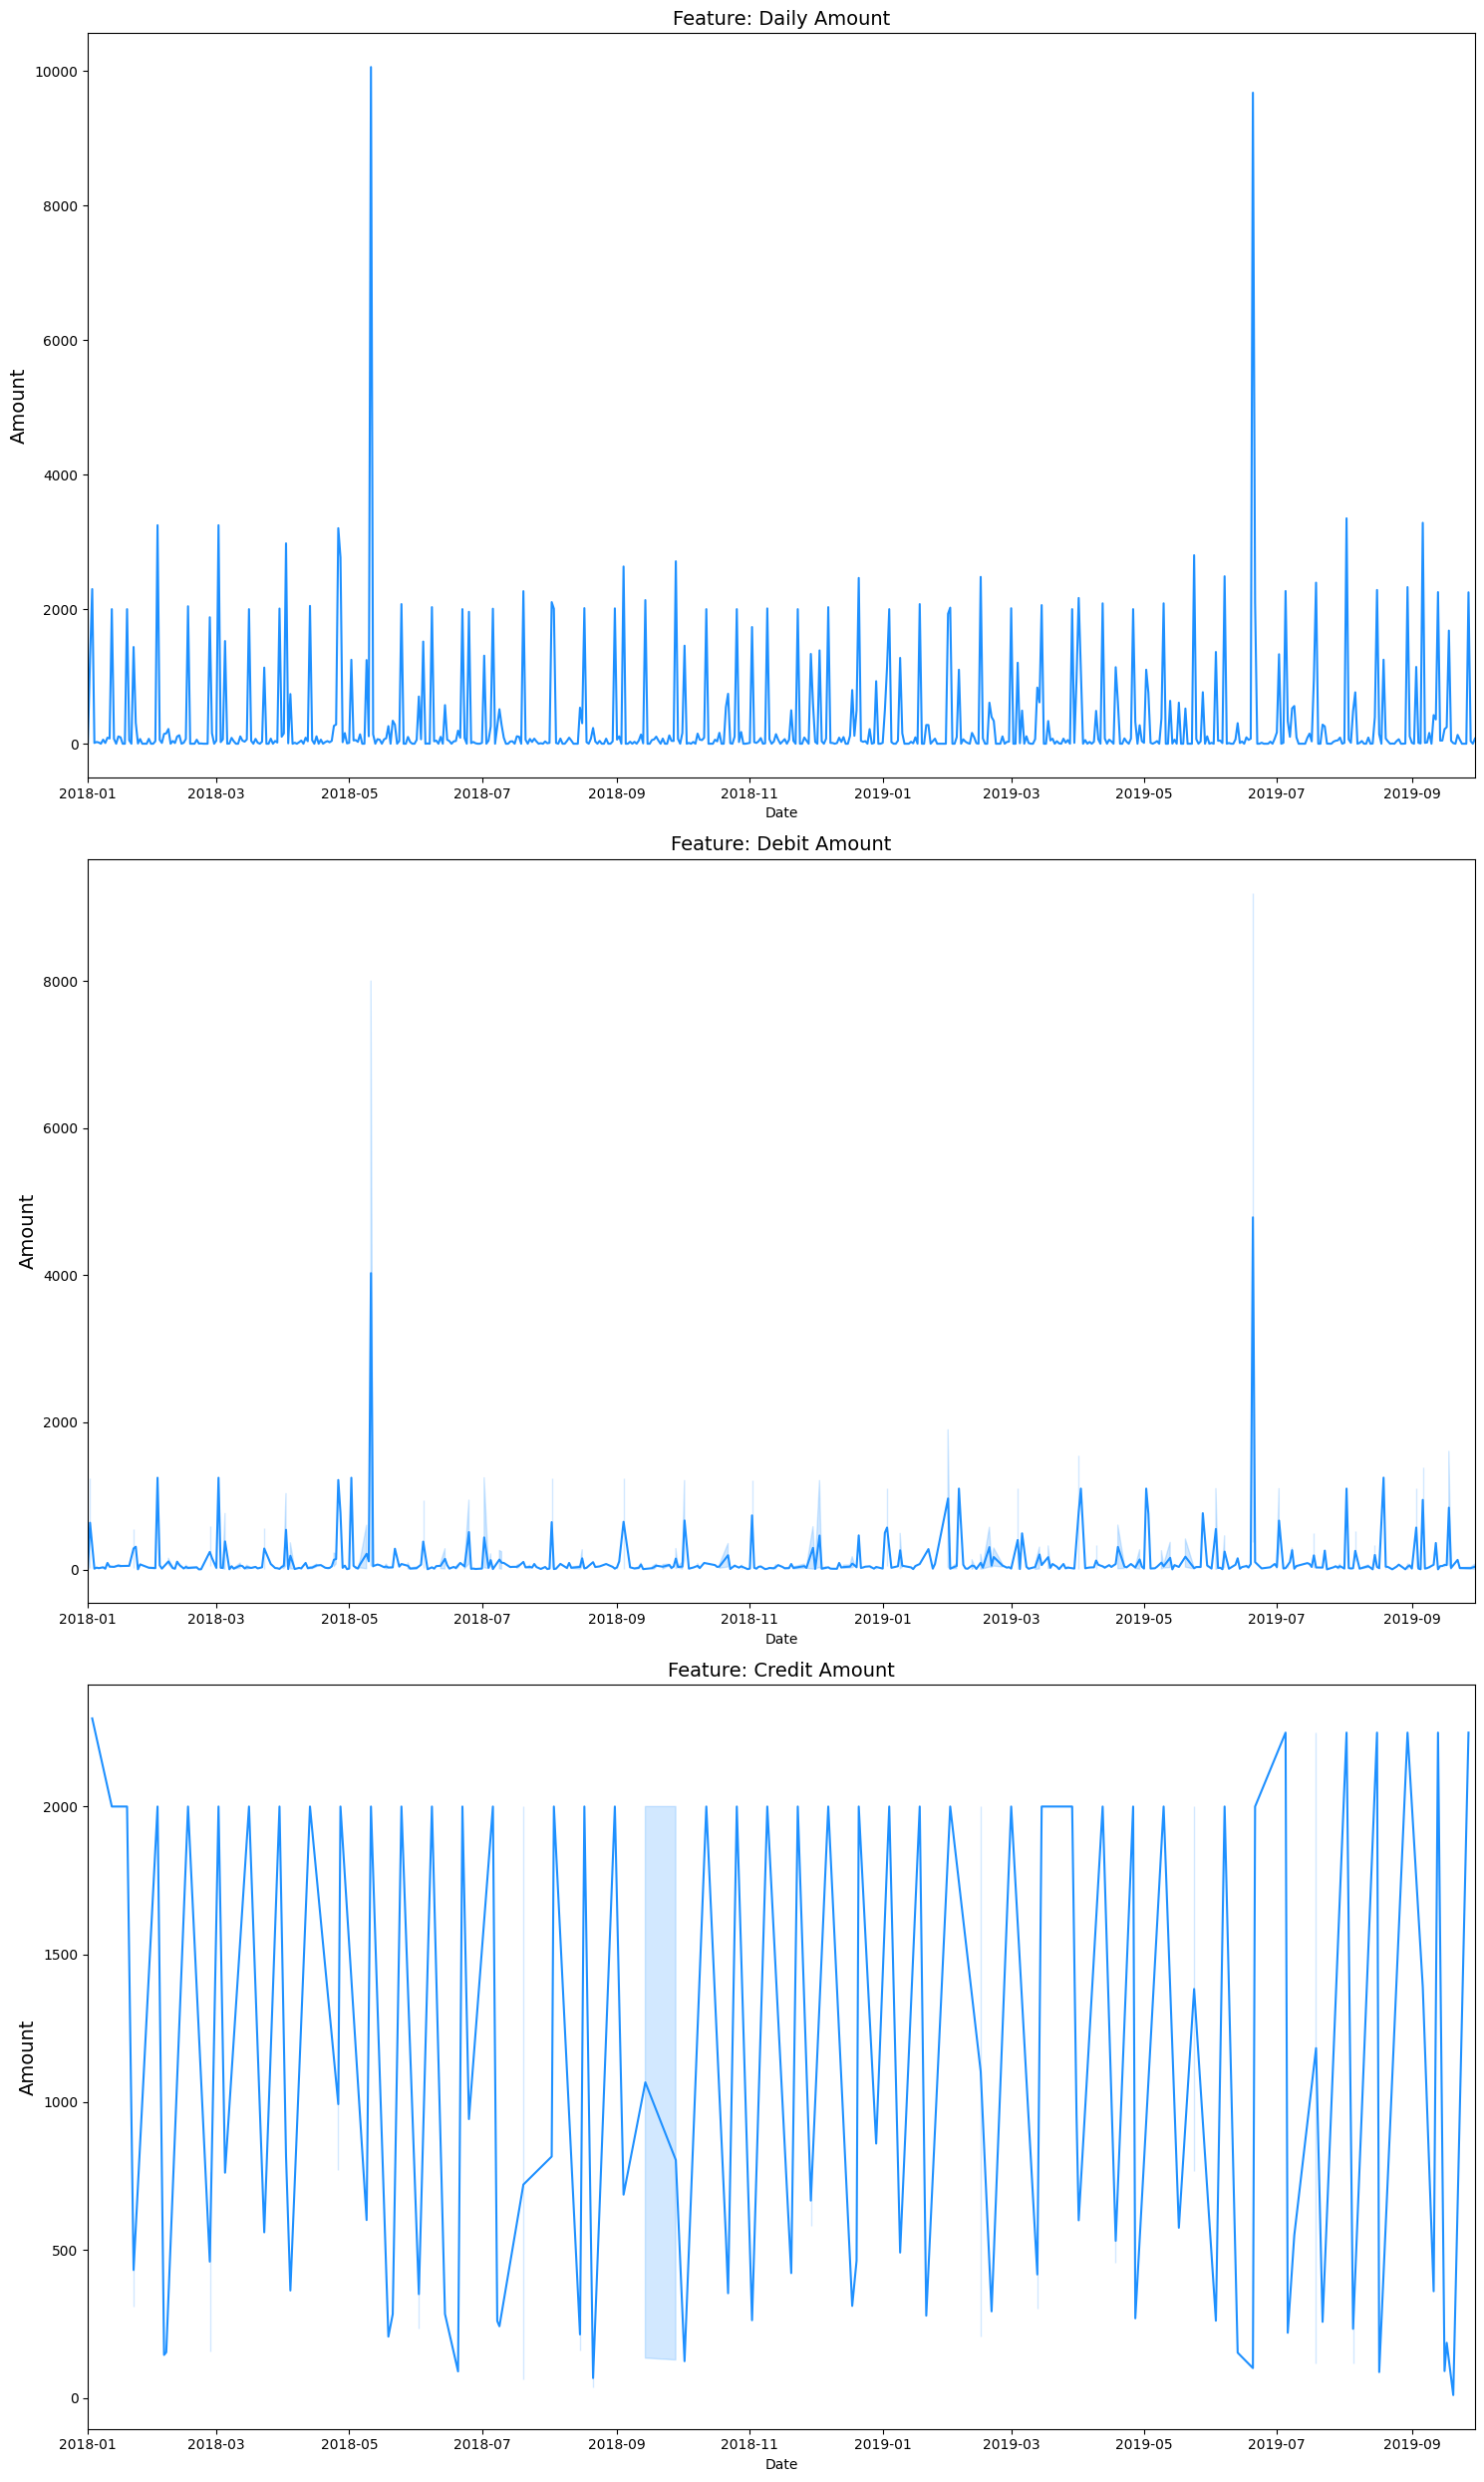

In [434]:
# Combine the dataframes into a list for easier iteration
dataframes = [daily_expenses_df, debit_expenses_df, credit_expenses_df]
titles = ['Feature: Daily Amount', 'Feature: Debit Amount', 'Feature: Credit Amount']

# Create subplots
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 25))

# Iterate through the dataframes and plot each one
for i, (df, title) in enumerate(zip(dataframes, titles)):
    column = df.columns[1]  # Assuming the second column is the data column
    sns.lineplot(x=df['Date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title(title, fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2018, 1, 1), date(2019, 9, 30)])

# Show the plot
plt.tight_layout()
plt.show()

In [435]:
daily_expenses_df = daily_expenses_df.drop('Delta', axis=1)
daily_expenses_df.isna().sum()

Date      0
Amount    0
dtype: int64

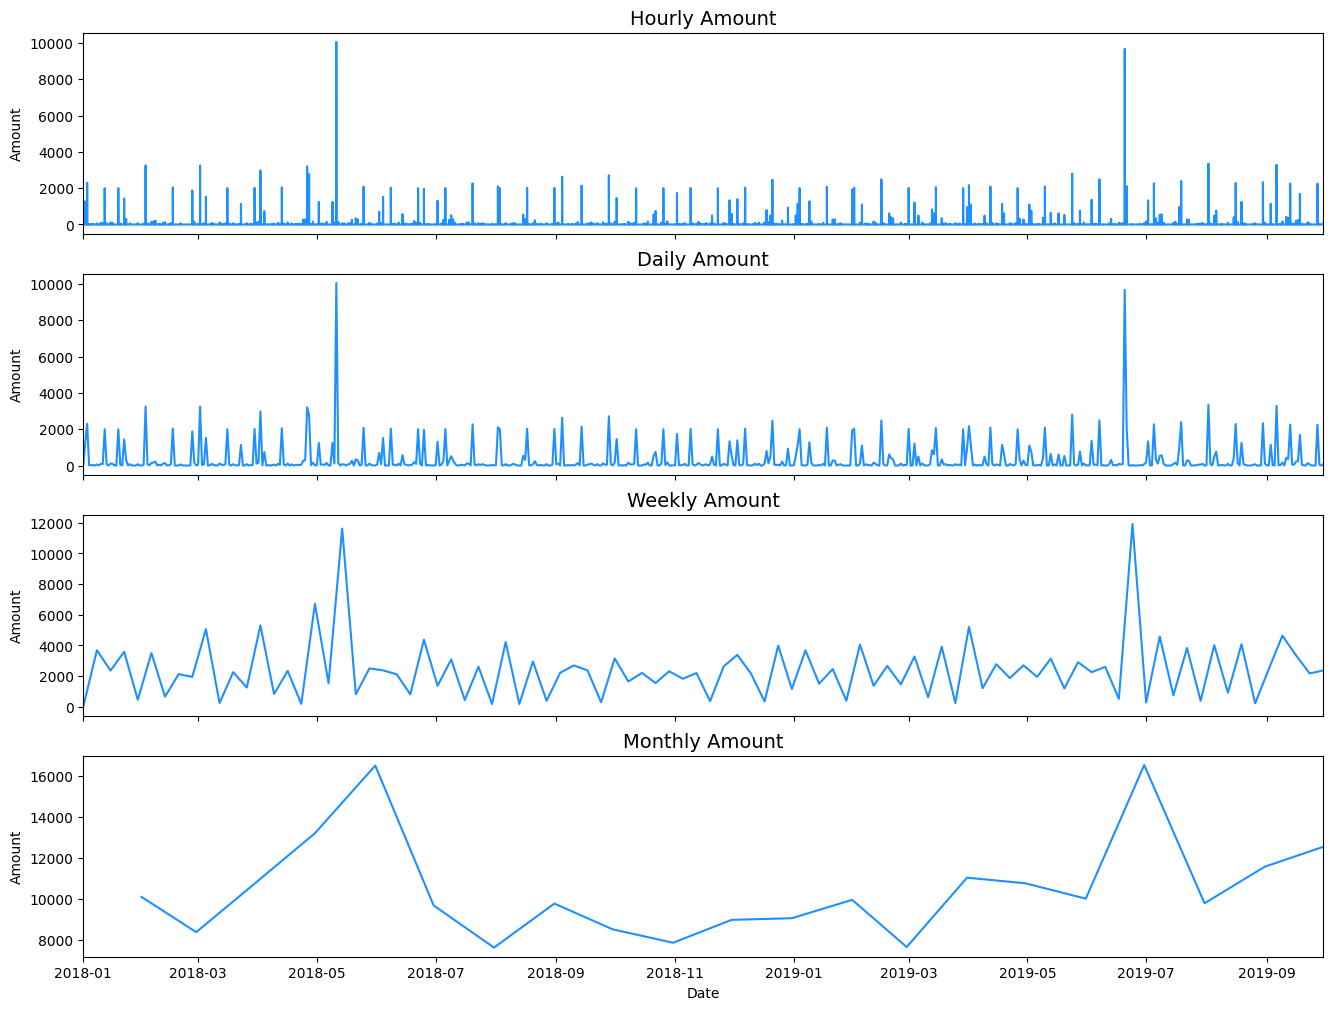

In [436]:
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,12))

hourly_expenses_resampled_df = daily_expenses_df[['Date','Amount']].resample('H', on='Date').sum().reset_index(drop=False)
sns.lineplot(x=hourly_expenses_resampled_df['Date'], y=hourly_expenses_resampled_df['Amount'], color='dodgerblue', ax=ax[0])
ax[0].set_title('Hourly Amount', fontsize=14)

sns.lineplot(x=daily_expenses_df['Date'], y=daily_expenses_df['Amount'], color='dodgerblue', ax=ax[1])
ax[1].set_title('Daily Amount', fontsize=14)

weekly_expenses_resampled_df = daily_expenses_df[['Date','Amount']].resample('W-MON', on='Date').sum().reset_index(drop=False)
sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=weekly_expenses_resampled_df['Amount'], color='dodgerblue', ax=ax[2])
ax[2].set_title('Weekly Amount', fontsize=14)

monthly_expenses_resampled_df = daily_expenses_df[['Date','Amount']].resample('M', on='Date').sum().reset_index(drop=False)
sns.lineplot(x=monthly_expenses_resampled_df['Date'], y=monthly_expenses_resampled_df['Amount'], color='dodgerblue', ax=ax[3])
ax[3].set_title('Monthly Amount', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2018, 1, 1), date(2019, 9, 30)])

**WEEKLY EXPENSES**

In [437]:
weekly_expenses_resampled_df.isna().sum()

Date      0
Amount    0
dtype: int64

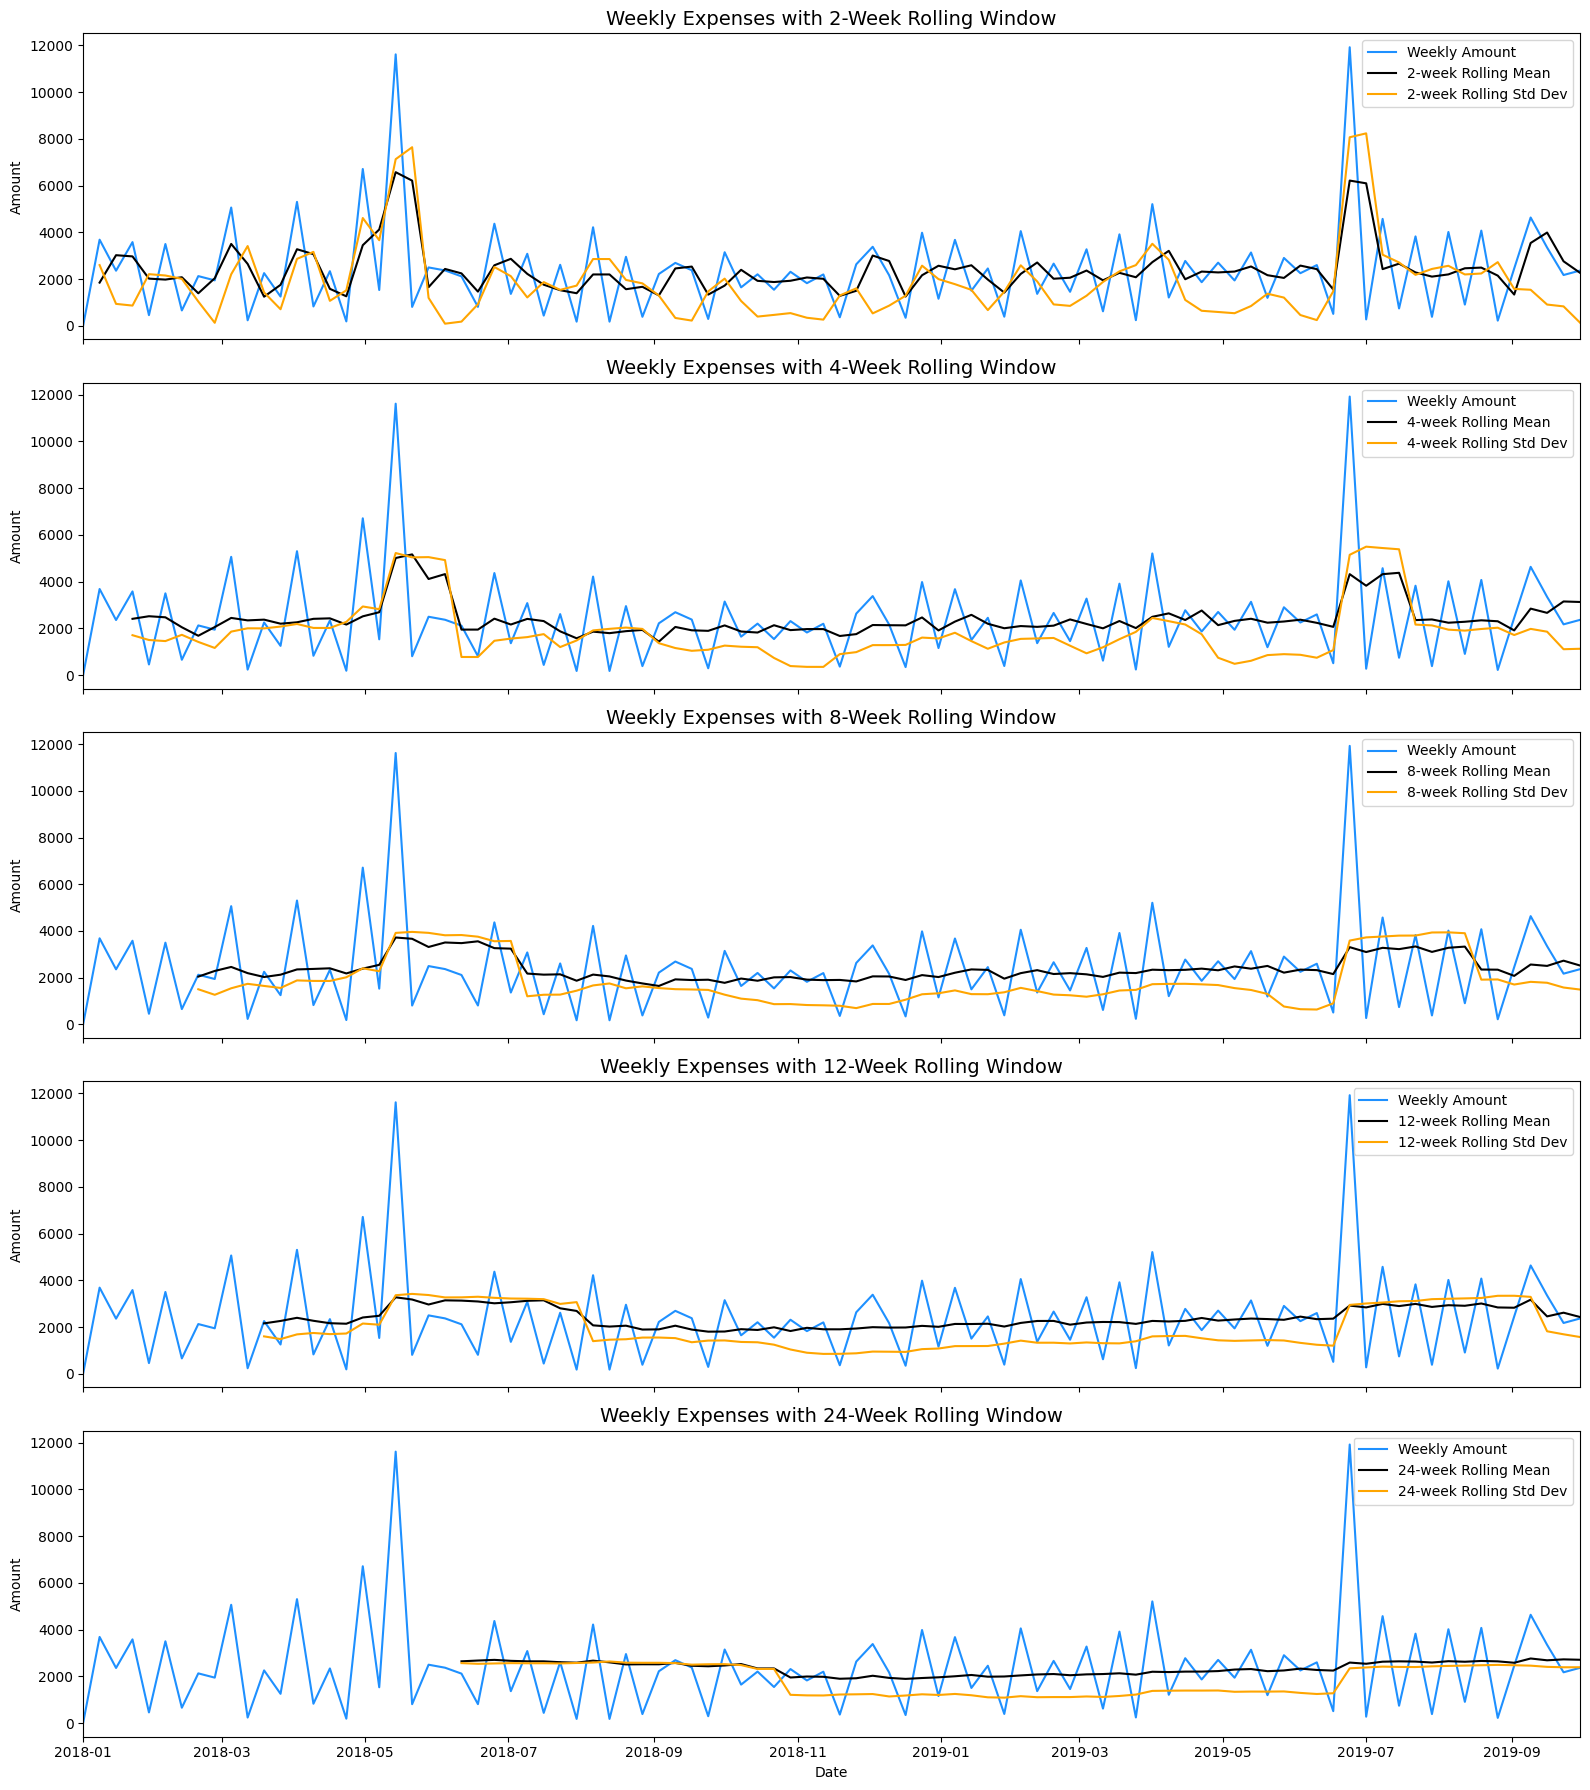

In [438]:
# Different rolling window sizes (in weeks)
rolling_windows = [2, 4, 8, 12, 24]  # 4 weeks (1 month), 8 weeks (2 months), 12 weeks (3 months)

fig, axes = plt.subplots(nrows=len(rolling_windows), ncols=1, figsize=(16, 18), sharex=True)

for idx, rolling_window in enumerate(rolling_windows):
    ax = axes[idx]
    sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=weekly_expenses_resampled_df['Amount'], ax=ax, color='dodgerblue', label='Weekly Amount')
    sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=weekly_expenses_resampled_df['Amount'].rolling(rolling_window).mean(), ax=ax, color='black', label=f'{rolling_window}-week Rolling Mean')
    sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=weekly_expenses_resampled_df['Amount'].rolling(rolling_window).std(), ax=ax, color='orange', label=f'{rolling_window}-week Rolling Std Dev')
    ax.set_title(f'Weekly Expenses with {rolling_window}-Week Rolling Window', fontsize=14)
    ax.set_xlim([pd.to_datetime('2018-01-01'), pd.to_datetime('2019-09-30')])
    ax.legend()

plt.tight_layout()
plt.show()

In [439]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller

In [440]:
result = adfuller(weekly_expenses_resampled_df['Amount'].values)
result
# Rejected null hypothesis, Weekly Expenses is Stationary

(-6.36266633345275,
 2.452630874952303e-08,
 1,
 90,
 {'1%': -3.505190196159122,
  '5%': -2.894232085048011,
  '10%': -2.5842101234567902},
 1411.9531711812888)

In [441]:
import numpy as np

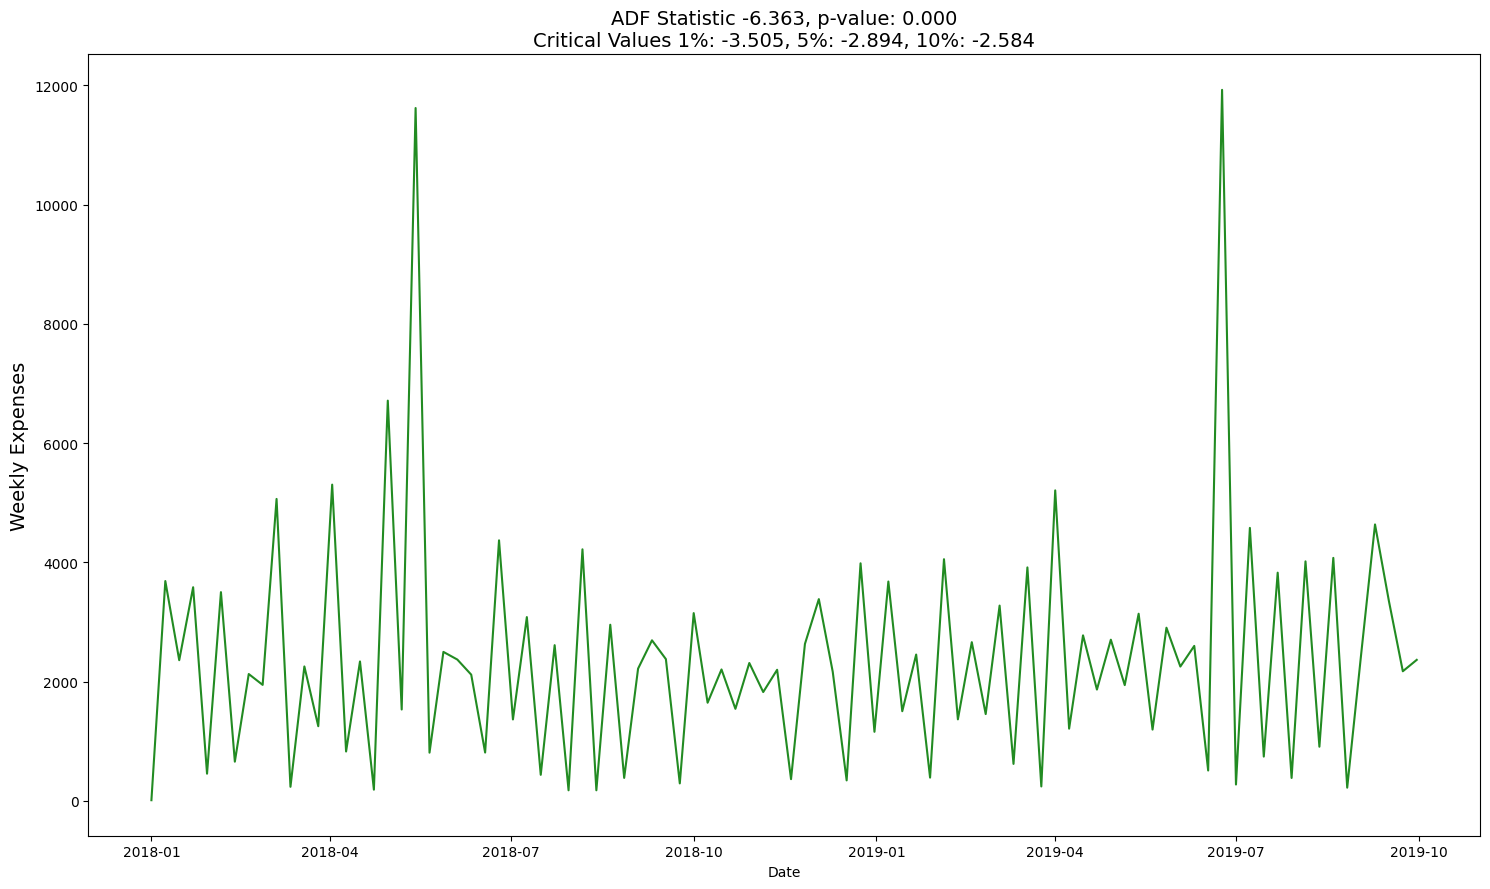

In [442]:
# Thanks to https://www.kaggle.com/iamleonie for this function!
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen'
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(weekly_expenses_resampled_df['Amount'].values, 'Weekly Expenses', ax)

plt.tight_layout()
plt.show()

In [443]:
# PERIOD = 12 WEEKS = 3 MONTHS

from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'Amount',
]

for column in core_columns:
    decomp = seasonal_decompose(weekly_expenses_resampled_df[column], period=12, model='additive', extrapolate_trend='freq')
    weekly_expenses_resampled_df[f"{column}_trend"] = decomp.trend
    weekly_expenses_resampled_df[f"{column}_seasonal"] = decomp.seasonal
    weekly_expenses_resampled_df[f"{column}_resid"] = decomp.resid

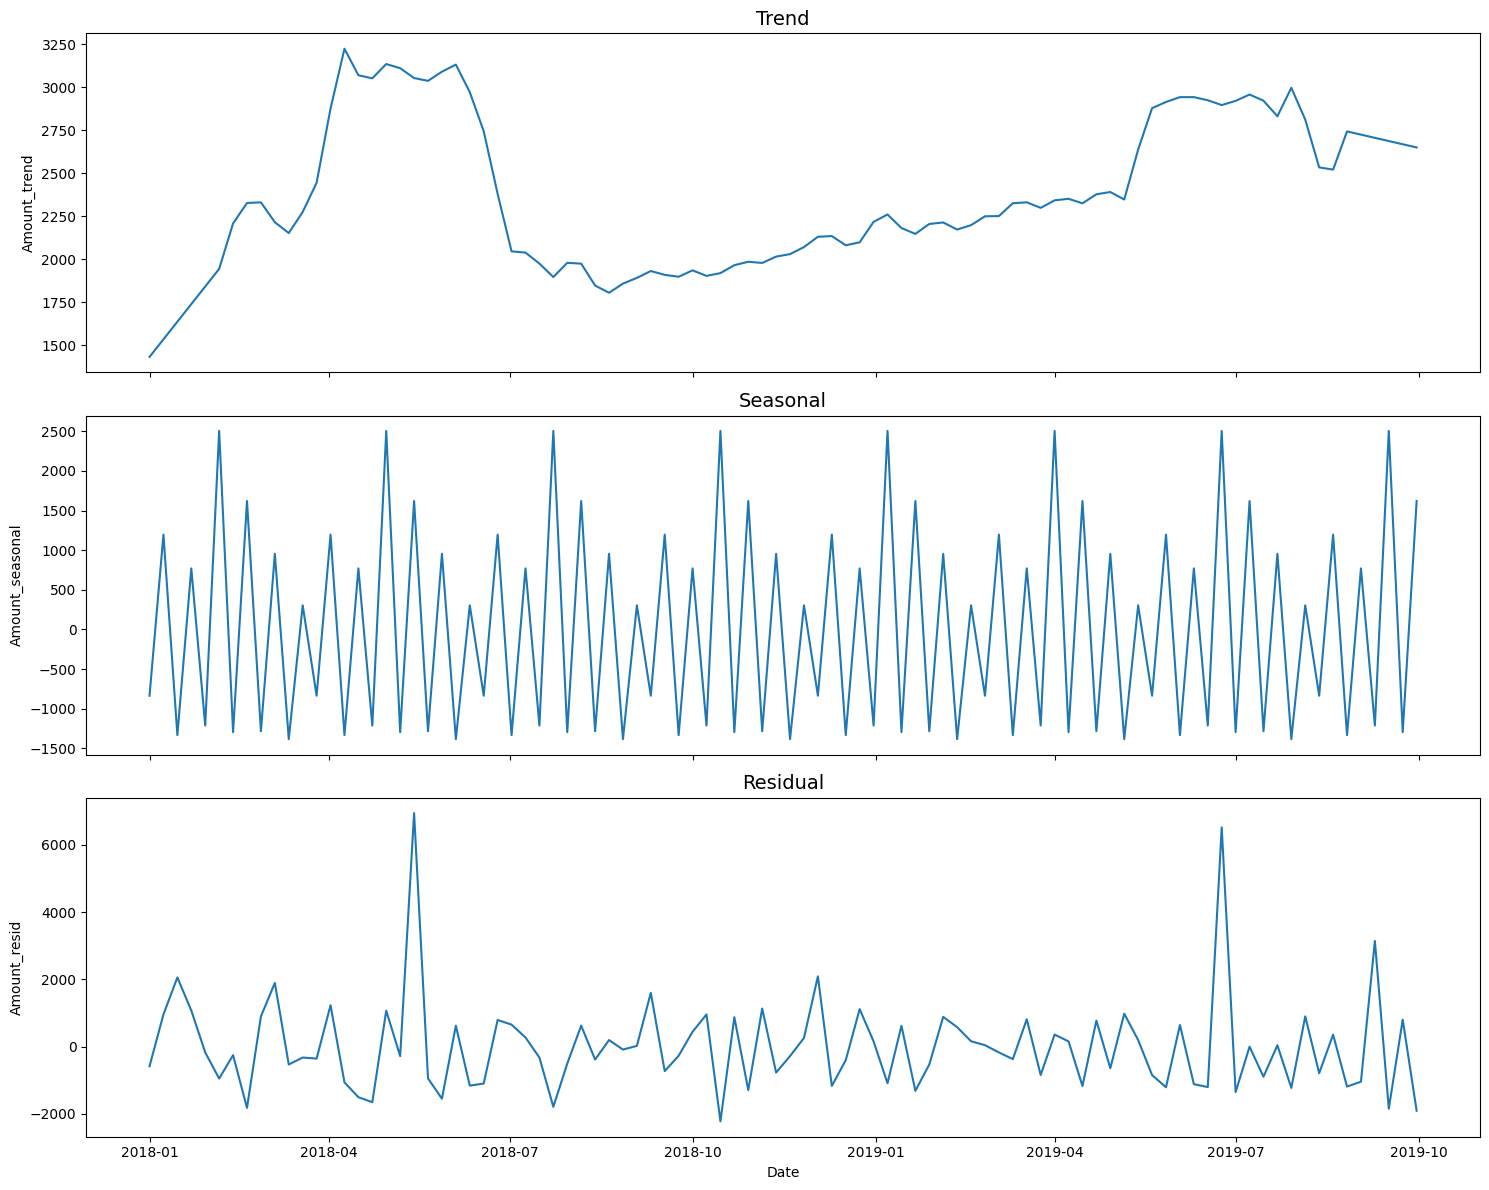

In [444]:
# Plot the decomposition
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 12), sharex=True)

# Trend
sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=weekly_expenses_resampled_df['Amount_trend'], ax=ax[0])
ax[0].set_title('Trend', fontsize=14)

# Seasonal
sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=weekly_expenses_resampled_df[f"{column}_seasonal"], ax=ax[1])
ax[1].set_title('Seasonal', fontsize=14)

# Residual
sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=weekly_expenses_resampled_df['Amount_resid'], ax=ax[2])
ax[2].set_title('Residual', fontsize=14)

plt.tight_layout()
plt.show()

In [445]:
weeks_in_month = 4

for column in core_columns:
    weekly_expenses_resampled_df[f'{column}_seasonal_shift_b_2m'] = weekly_expenses_resampled_df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    weekly_expenses_resampled_df[f'{column}_seasonal_shift_b_1m'] = weekly_expenses_resampled_df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    weekly_expenses_resampled_df[f'{column}_seasonal_shift_1m'] = weekly_expenses_resampled_df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    weekly_expenses_resampled_df[f'{column}_seasonal_shift_2m'] = weekly_expenses_resampled_df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    weekly_expenses_resampled_df[f'{column}_seasonal_shift_3m'] = weekly_expenses_resampled_df[f'{column}_seasonal'].shift(3 * weeks_in_month)

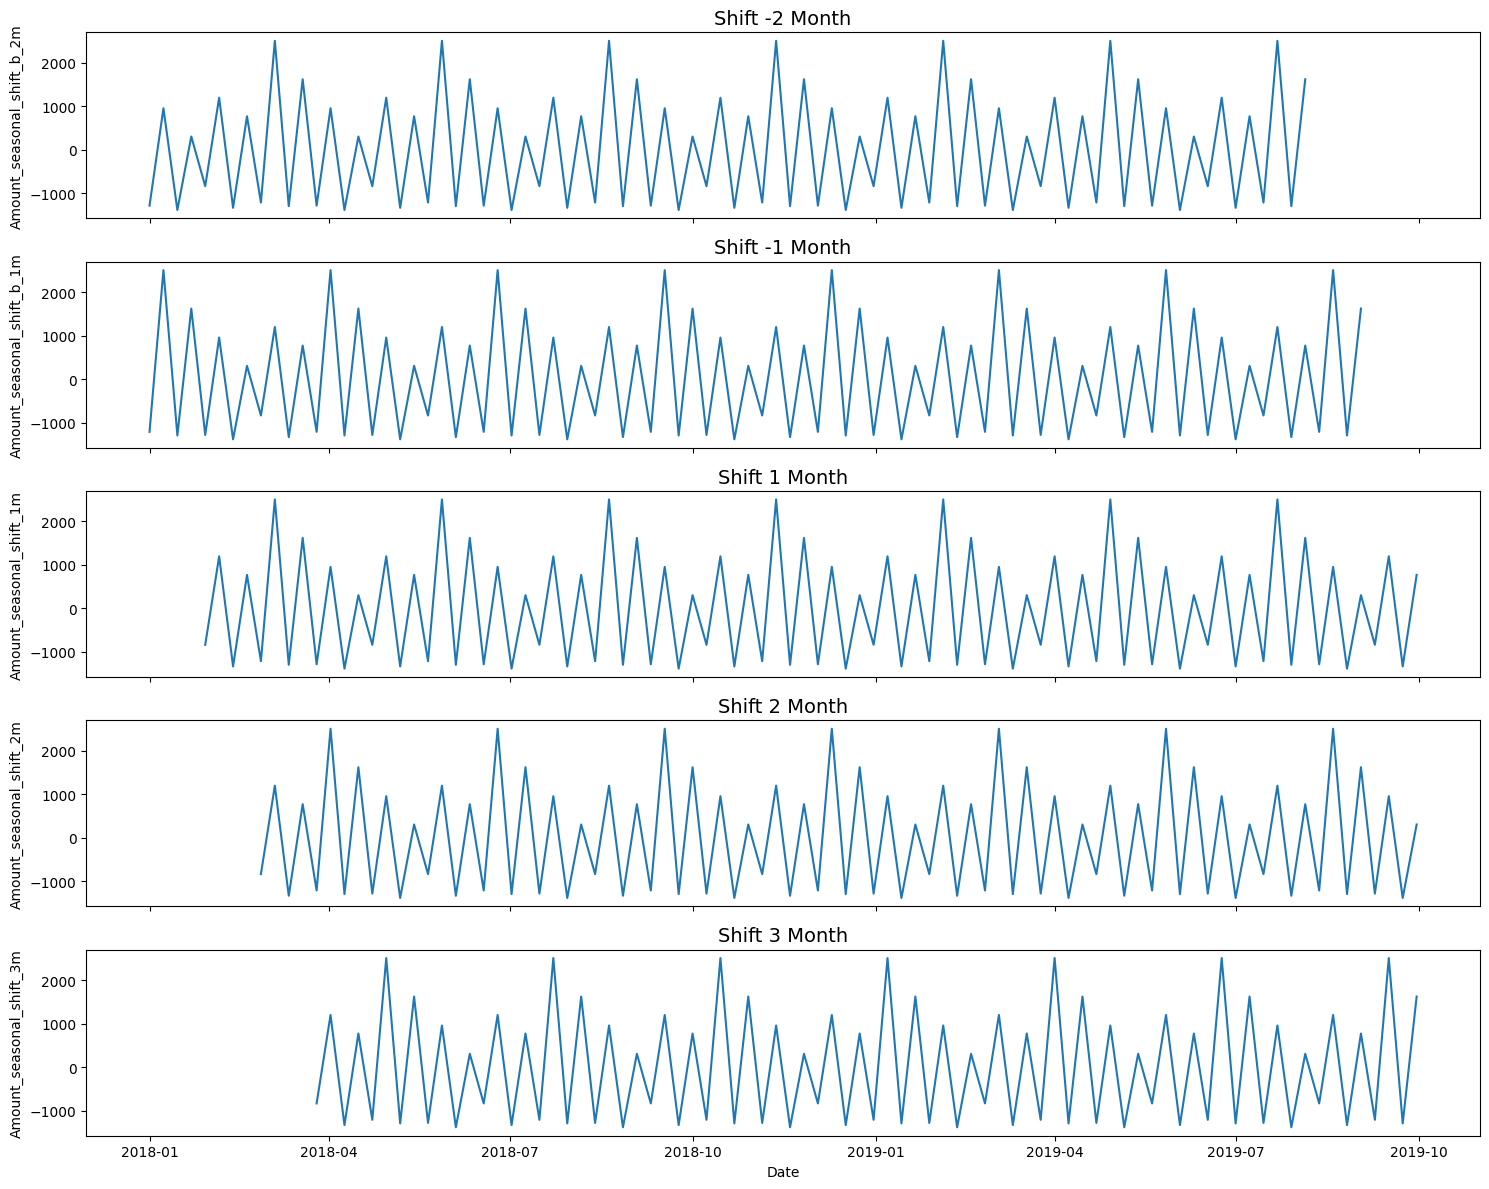

In [446]:
# Plot the lag
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12), sharex=True)

# Shift -2 Month
sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=weekly_expenses_resampled_df['Amount_seasonal_shift_b_2m'], ax=ax[0])
ax[0].set_title('Shift -2 Month', fontsize=14)

# Shift -1 Month
sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=weekly_expenses_resampled_df['Amount_seasonal_shift_b_1m'], ax=ax[1])
ax[1].set_title('Shift -1 Month', fontsize=14)

# Shift 1 Month
sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=weekly_expenses_resampled_df['Amount_seasonal_shift_1m'], ax=ax[2])
ax[2].set_title('Shift 1 Month', fontsize=14)

# Shift 2 Month
sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=weekly_expenses_resampled_df['Amount_seasonal_shift_2m'], ax=ax[3])
ax[3].set_title('Shift 2 Month', fontsize=14)

# Shift 3 Month
sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=weekly_expenses_resampled_df['Amount_seasonal_shift_3m'], ax=ax[4])
ax[4].set_title('Shift 3 Month', fontsize=14)

plt.tight_layout()
plt.show()

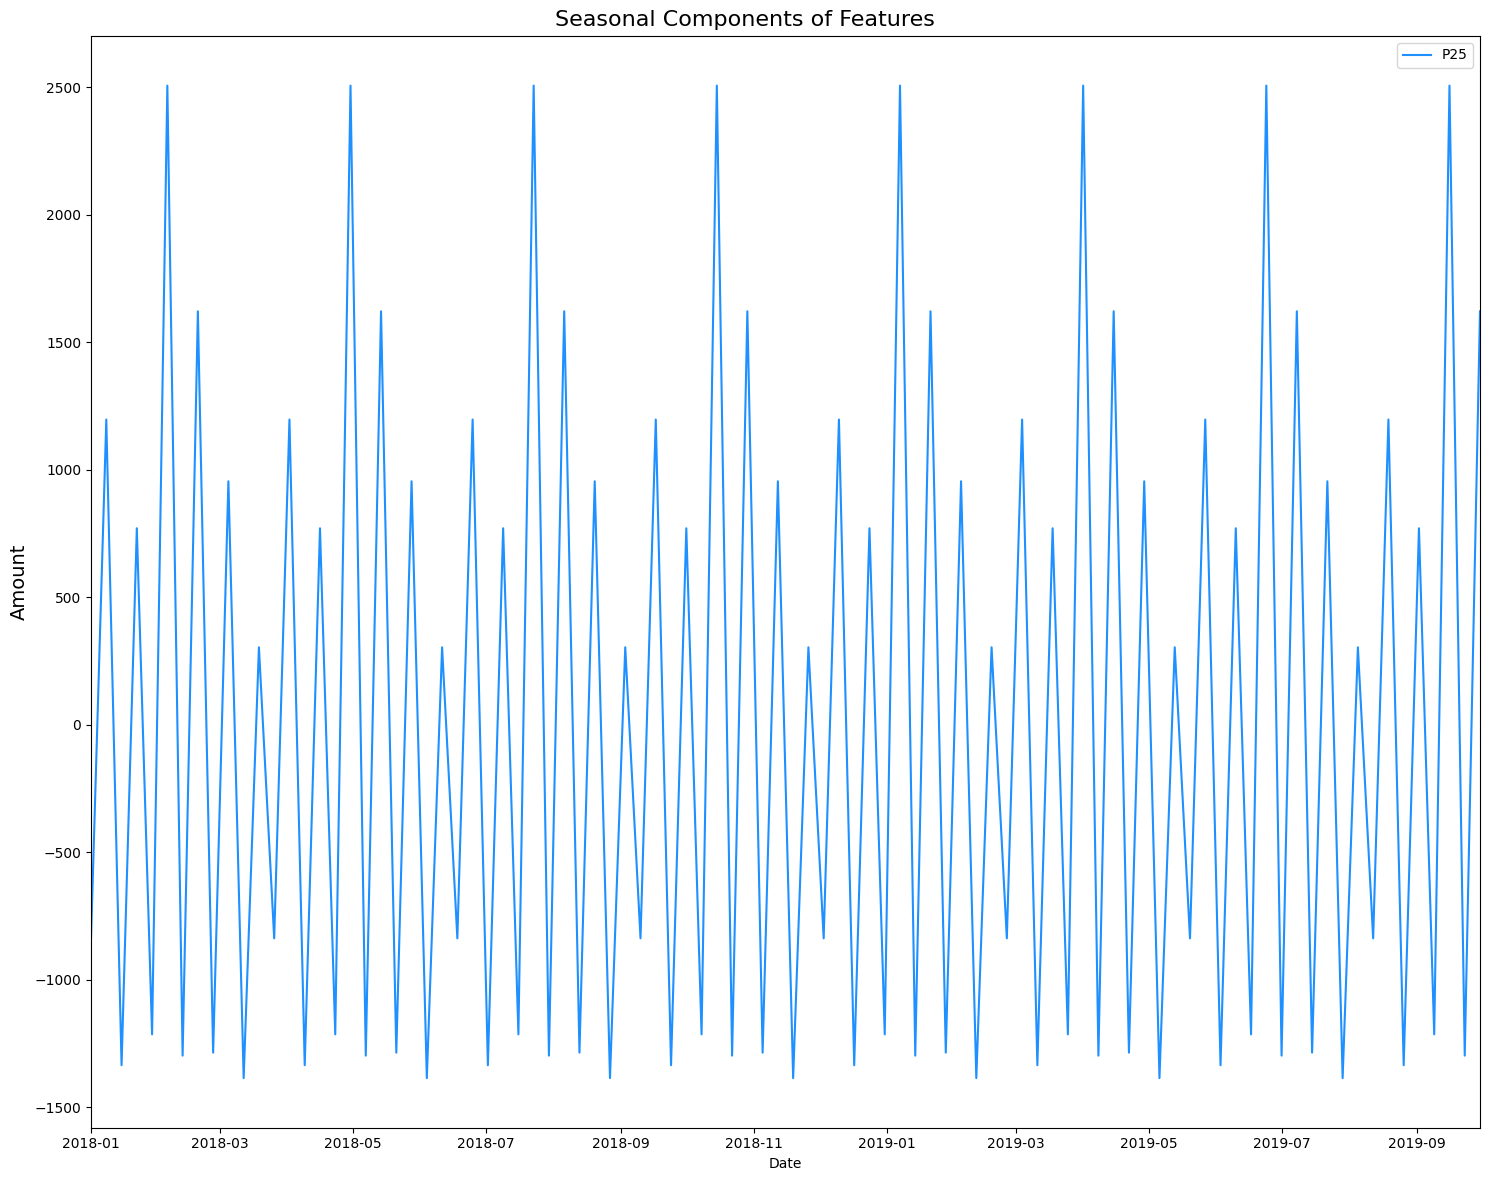

In [447]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=weekly_expenses_resampled_df[f'{column}_seasonal'], ax=ax, color='dodgerblue', label='P25')
    ax.set_ylabel(ylabel=column, fontsize=14)
    ax.set_xlim([date(2018, 1, 1), date(2019, 9, 30)])

plt.tight_layout()
plt.show()

In [448]:
# # Seasonality Removal
# fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(16,12))

# sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=weekly_expenses_resampled_df['Amount'], color='dodgerblue', ax=ax[0])
# ax[0].set_title('Weekly Amount\nBefore Seasonality Removal', fontsize=14)
# ax[0].set_xlim([date(2018, 1, 1), date(2019, 9, 30)])

# weekly_expenses_resampled_df['Amount'] = weekly_expenses_resampled_df['Amount'] - weekly_expenses_resampled_df["Amount_seasonal"]
# sns.lineplot(x=weekly_expenses_resampled_df['Date'], y=weekly_expenses_resampled_df['Amount'], color='dodgerblue', ax=ax[1])
# ax[1].set_title('Weekly Amount\nAfter Seasonality Removal', fontsize=14)
# ax[1].set_xlim([date(2018, 1, 1), date(2019, 9, 30)])

# plt.tight_layout()
# plt.show()

In [449]:
from dataclasses import dataclass
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [638]:
# Extract the 'Amount' column
amount_series = weekly_expenses_resampled_df['Amount'].values

# Membuat array dari 0 sampai length-1 menggunakan numpy.arange
time_series = np.arange(len(weekly_expenses_resampled_df['Amount']))

# # Normalize the data
# scaler = MinMaxScaler()
# amount_series_normalized = scaler.fit_transform(amount_series.reshape(-1, 1)).flatten()

In [639]:
def simple_plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Weekly Expenses")
    plt.grid(True)

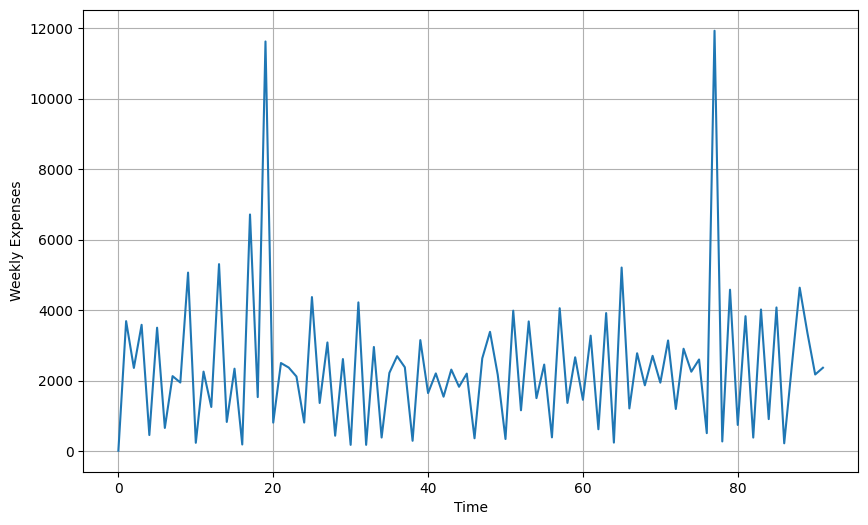

In [640]:
# Test your function and save all "global" variables within the G class (G stands for global)
@dataclass
class G:
    SERIES = amount_series
    TIME = time_series
    SPLIT_TIME = int(0.8 * len(amount_series))  # 80-20 train-test split
    WINDOW_SIZE = 8
    BATCH_SIZE = 16
    SHUFFLE_BUFFER_SIZE = 100

plt.figure(figsize=(10, 6))
simple_plot_series(G.TIME, G.SERIES)
plt.show()

In [641]:
def train_val_split(time, series, time_step=G.SPLIT_TIME):

    time_train = time[:time_step]
    series_train = series[:time_step]
    time_valid = time[time_step:]
    series_valid = series[time_step:]

    return time_train, series_train, time_valid, series_valid

In [642]:
# Function to create windowed dataset
def windowed_dataset(series, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    ds = ds.batch(batch_size).prefetch(1)
    return ds

In [643]:
# Split the dataset
time_train, series_train, time_valid, series_valid = train_val_split(G.TIME, G.SERIES)

In [644]:
# Apply the transformation to the training set
train_set = windowed_dataset(series_train, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)

# # Apply the transformation to the validation set
# valid_set = windowed_dataset(series_valid, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)

In [645]:
def create_uncompiled_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[G.WINDOW_SIZE, 1]),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(30, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1),
        tf.keras.layers.Lambda(lambda x: x * 400)
    ])

    return model

In [646]:
# Create an instance of the model
model = create_uncompiled_model()

# Get one batch of the training set(X = input, y = label)
for X, y in train_set.take(1):

    # Generate a prediction
    print(f'Testing model prediction with input of shape {X.shape}...')
    y_pred = model.predict(X)

# Compare the shape of the prediction and the label y (remove dimensions of size 1)
y_pred_shape = y_pred.squeeze().shape

assert y_pred_shape == y.shape, (f'Squeezed predicted y shape = {y_pred_shape} '
                                           f'whereas actual y shape = {y.shape}.')

print("Your current architecture is compatible with the windowed dataset! :)")

Testing model prediction with input of shape (16, 8)...
1/1 [==============================] - 1s 1s/step
Your current architecture is compatible with the windowed dataset! :)


In [647]:
def adjust_learning_rate(dataset):

    model = create_uncompiled_model()

    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

    # Select your optimizer
    optimizer = tf.keras.optimizers.SGD(momentum=0.9)

    # Compile the model passing in the appropriate loss
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])

    history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

    return history

In [648]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(train_set)

Epoch 1/100
5/5 [==============================] - 5s 43ms/step - loss: 1749.5645 - mae: 1750.0645 - lr: 1.0000e-04
Epoch 2/100
5/5 [==============================] - 0s 18ms/step - loss: 2135.5642 - mae: 2136.0642 - lr: 1.1220e-04
Epoch 3/100
5/5 [==============================] - 0s 17ms/step - loss: 1850.6786 - mae: 1851.1786 - lr: 1.2589e-04
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 1388.1493 - mae: 1388.6493 - lr: 1.4125e-04
Epoch 5/100
5/5 [==============================] - 0s 18ms/step - loss: 1598.6864 - mae: 1599.1864 - lr: 1.5849e-04
Epoch 6/100
5/5 [==============================] - 0s 20ms/step - loss: 1488.6630 - mae: 1489.1630 - lr: 1.7783e-04
Epoch 7/100
5/5 [==============================] - 0s 20ms/step - loss: 1270.6018 - mae: 1271.1018 - lr: 1.9953e-04
Epoch 8/100
5/5 [==============================] - 0s 23ms/step - loss: 1249.4053 - mae: 1249.9053 - lr: 2.2387e-04
Epoch 9/100
5/5 [==============================] - 0s 18ms/step - loss: 

(0.0001, 10.0, 0.0, 10.0)

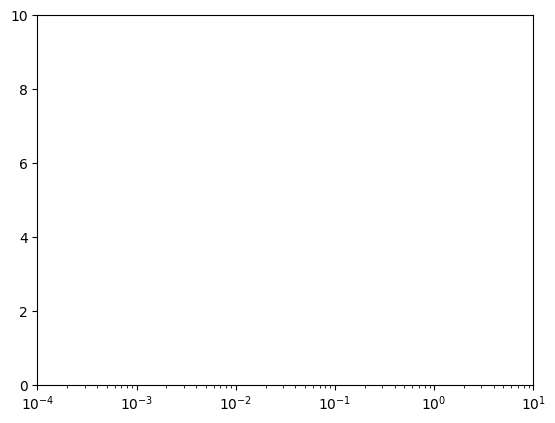

In [649]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 10, 0, 10])

In [670]:
def create_model():
    model = create_uncompiled_model()
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer= tf.keras.optimizers.SGD(learning_rate=0.000001, momentum=0.9),
                  metrics=["mae"])
    return model

In [678]:
# Save an instance of the model
model = create_model()

# Train it
history = model.fit(train_set, epochs=100)

Epoch 1/100
5/5 [==============================] - 10s 27ms/step - loss: 2173.7837 - mae: 2174.2837
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 2131.6025 - mae: 2132.1025
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 2065.7627 - mae: 2066.2627
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 1984.9214 - mae: 1985.4199
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 1911.0754 - mae: 1911.5754
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 1849.9238 - mae: 1850.4238
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 1786.6886 - mae: 1787.1886
Epoch 8/100
5/5 [==============================] - 0s 13ms/step - loss: 1704.1407 - mae: 1704.6407
Epoch 9/100
5/5 [==============================] - 0s 14ms/step - loss: 1618.1818 - mae: 1618.6818
Epoch 10/100
5/5 [==============================] - 0s 17ms/step - loss: 1538.5543 - mae: 1539.0543
Epoch 11

In [679]:
def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualizes time series data

    Args:
      x (array of int) - contains values for the x-axis
      y (array of int or tuple of arrays) - contains the values for the y-axis
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      title (string) - title of the plot
      xlabel (string) - label for the x-axis
      ylabel (string) - label for the y-axis
      legend (list of strings) - legend for the plot
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

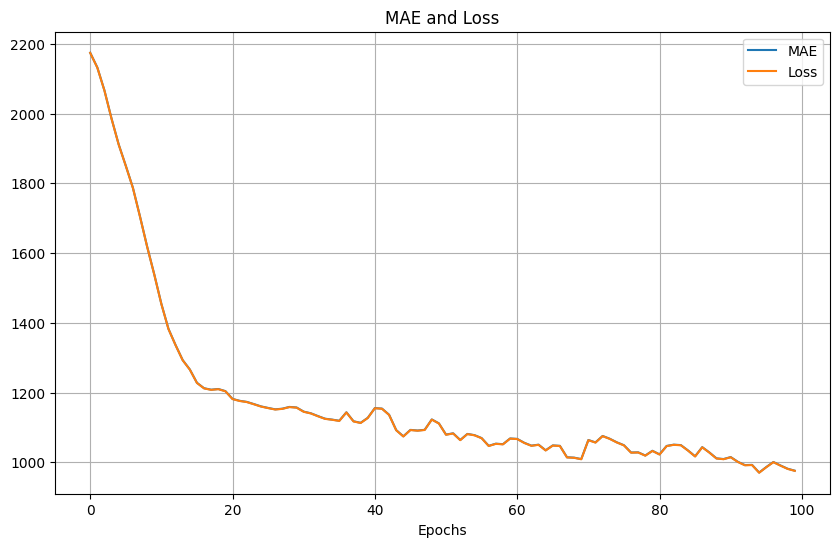

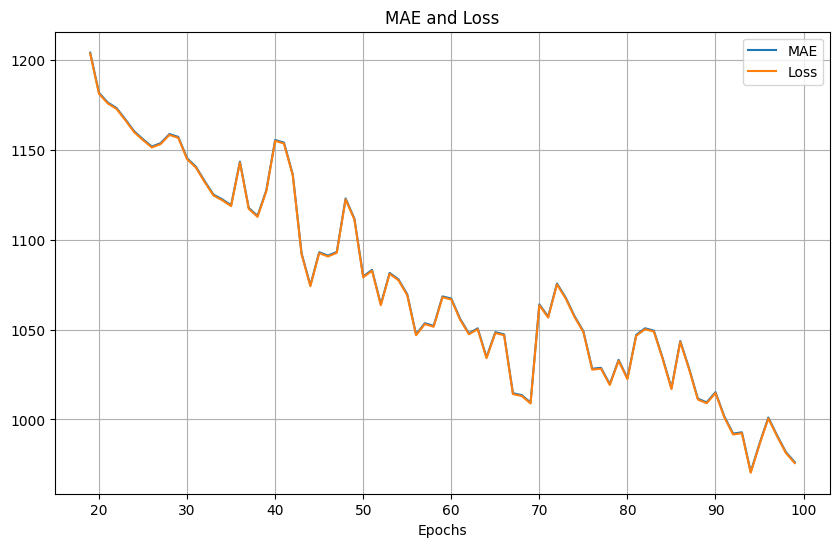

In [680]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss))

# Plot mae and loss
plot_series(
    x=epochs,
    y=(mae, loss),
    title='MAE and Loss',
    xlabel='Epochs',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom,
    y=(mae_zoom, loss_zoom),
    title='MAE and Loss',
    xlabel='Epochs',
    legend=['MAE', 'Loss']
    )

In [681]:
def compute_metrics(true_series, forecast):

    mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
    mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()

    return mse, mae

In [682]:
# def model_forecast(model, series, window_size):
#     series = series[..., np.newaxis]
#     ds = tf.data.Dataset.from_tensor_slices(series)
#     ds = ds.window(window_size, shift=1, drop_remainder=True)
#     ds = ds.flat_map(lambda w: w.batch(window_size))
#     ds = ds.batch(4).prefetch(1)
#     forecast = model.predict(ds)
#     return forecast
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

6/6 [==============================] - 1s 8ms/step


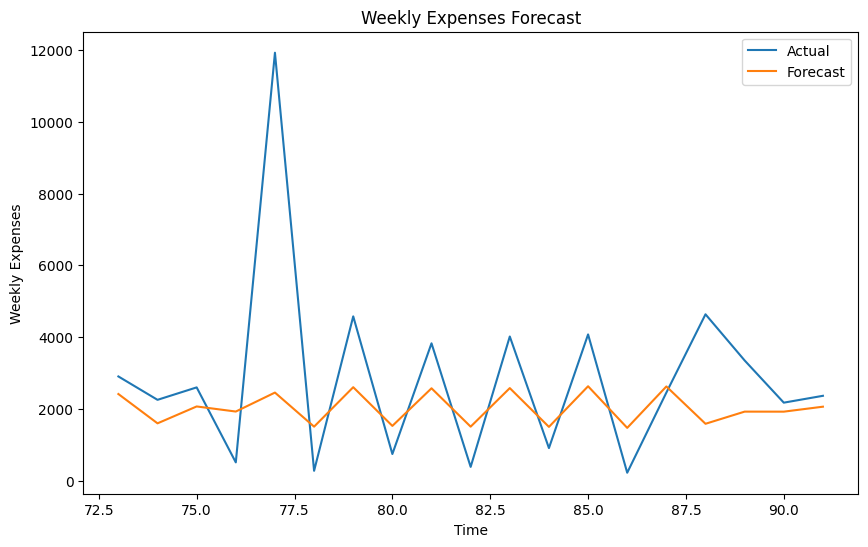

In [683]:
# Compute the forecast for all the series
rnn_forecast = model_forecast(model, G.SERIES, G.WINDOW_SIZE, G.BATCH_SIZE).squeeze()

# De-normalize the data
# rnn_forecast = scaler.inverse_transform(rnn_forecast.reshape(-1, 1)).flatten()

# Slice the forecast to get only the predictions for the validation set
rnn_forecast = rnn_forecast[G.SPLIT_TIME - G.WINDOW_SIZE:-1]

# Plot the forecast
plt.figure(figsize=(10, 6))
# plt.plot(G.TIME[G.SPLIT_TIME:], scaler.inverse_transform(G.SERIES[G.SPLIT_TIME:].reshape(-1, 1)).flatten(), label='Actual')
plt.plot(G.TIME[G.SPLIT_TIME:], G.SERIES[G.SPLIT_TIME:], label='Actual')
plt.plot(G.TIME[G.SPLIT_TIME:], rnn_forecast, label='Forecast')
plt.title('Weekly Expenses Forecast')
plt.xlabel('Time')
plt.ylabel('Weekly Expenses')
plt.legend()
plt.show()

# # Reduce the original series
# forecast_series = G.SERIES[G.SPLIT_TIME - G.WINDOW_SIZE:-1]

# # Use helper function to generate predictions
# forecast = model_forecast(model, forecast_series, G.WINDOW_SIZE, G.BATCH_SIZE)

# # Drop single dimensional axes
# results = forecast.squeeze()

# # Plot the results
# plot_series(time_valid, (series_valid, results))

In [684]:
mse, mae = compute_metrics(series_valid, rnn_forecast)

print(f"mse: {mse:.2f}, mae: {mae:.2f} for forecast")

mse: 6265969.50, mae: 1518.21 for forecast
